GIF saved as smiley_animation.gif


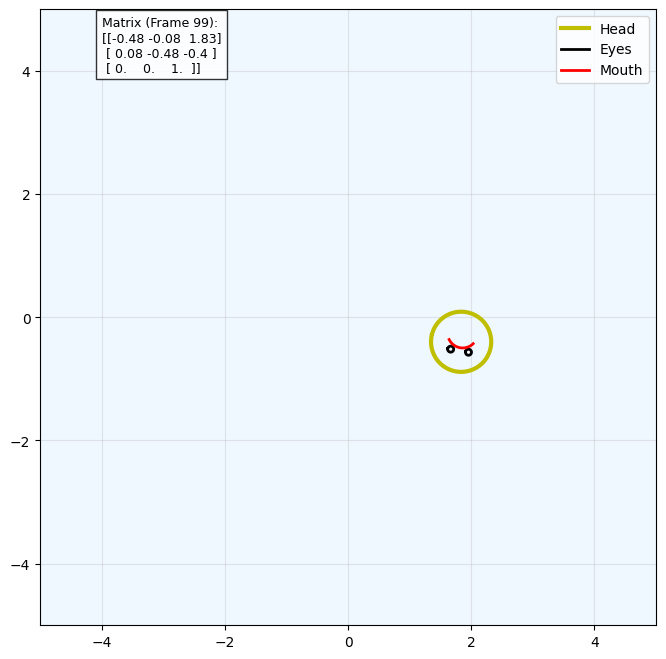

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import imageio

# Define a smiley face using 2D points in homogeneous coordinates
def create_circle(cx, cy, r, num_points=50):
    theta = np.linspace(0, 2 * np.pi, num_points, endpoint=False)
    x = cx + r * np.cos(theta)
    y = cy + r * np.sin(theta)
    return np.vstack((x, y, np.ones(num_points)))

def create_arc(cx, cy, r, start_angle, end_angle, num_points=50):
    theta = np.linspace(start_angle, end_angle, num_points)
    x = cx + r * np.cos(theta)
    y = cy + r * np.sin(theta)
    return np.vstack((x, y, np.ones(num_points)))

# Smiley face components
head = create_circle(0, 0, 1)  # Head: radius 1, centered at (0,0)
left_eye = create_circle(-0.3, 0.3, 0.1)  # Left eye
right_eye = create_circle(0.3, 0.3, 0.1)  # Right eye
mouth = create_arc(0, -0.3, 0.5, np.pi * 0.2, np.pi * 0.8)  # Smiling mouth

# Transformation matrices
def translation_matrix(dx, dy):
    return np.array([
        [1, 0, dx],
        [0, 1, dy],
        [0, 0, 1]
    ])

def rotation_matrix(theta):
    return np.array([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta), np.cos(theta), 0],
        [0, 0, 1]
    ])

def scale_matrix(sx, sy):
    return np.array([
        [sx, 0, 0],
        [0, sy, 0],
        [0, 0, 1]
    ])

# Set up the plot
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_aspect('equal')
ax.set_facecolor('#f0f8ff')  # Light blue background
ax.grid(True, alpha=0.3)

# Plot components with different colors
head_line, = ax.plot([], [], 'y-', lw=3, label='Head')  # Yellow head
left_eye_line, = ax.plot([], [], 'k-', lw=2, label='Eyes')  # Black eyes
right_eye_line, = ax.plot([], [], 'k-', lw=2)
mouth_line, = ax.plot([], [], 'r-', lw=2, label='Mouth')  # Red mouth
matrix_text = ax.text(-4, 4, '', fontsize=9, bbox=dict(facecolor='white', alpha=0.8))
ax.legend(loc='upper right')

# Initialize the plot
def init():
    head_line.set_data([], [])
    left_eye_line.set_data([], [])
    right_eye_line.set_data([], [])
    mouth_line.set_data([], [])
    matrix_text.set_text('')
    return head_line, left_eye_line, right_eye_line, mouth_line, matrix_text

# Animation update function
def update(frame):
    t = frame / 50  # Time parameter

    # Define transformations
    dx = 2 * np.sin(t)  # Wave-like motion
    dy = 1 * np.cos(t)
    T = translation_matrix(dx, dy)

    theta = t * 1.5  # Faster rotation
    R = rotation_matrix(theta)

    s = 1 + 0.7 * np.sin(t * 2)  # More pronounced scaling
    S = scale_matrix(s, s)

    # Combine transformations: T * R * S
    M = T @ R @ S

    # Apply transformation to each component
    transformed_head = M @ head
    transformed_left_eye = M @ left_eye
    transformed_right_eye = M @ right_eye
    transformed_mouth = M @ mouth

    # Update plot data
    head_line.set_data(transformed_head[0, :], transformed_head[1, :])
    left_eye_line.set_data(transformed_left_eye[0, :], transformed_left_eye[1, :])
    right_eye_line.set_data(transformed_right_eye[0, :], transformed_right_eye[1, :])
    mouth_line.set_data(transformed_mouth[0, :], transformed_mouth[1, :])

    # Display transformation matrix
    matrix_str = f'Matrix (Frame {frame}):\n{np.round(M, 2)}'
    matrix_text.set_text(matrix_str)

    return head_line, left_eye_line, right_eye_line, mouth_line, matrix_text

# Create animation
frames = 100
ani = FuncAnimation(fig, update, init_func=init, frames=frames, interval=50, blit=True)

# Save animation as GIF
gif_path = 'smiley_animation.gif'
ani.save(gif_path, writer='imageio', fps=20)

print(f"GIF saved as {gif_path}")